In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()

ImportError: cannot import name '_is_pandas_dataframe' from 'matplotlib.cbook' (D:\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py)

In [9]:
from platform import python_version

print(python_version())

3.12.3


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Project Session Track- Feb 2025/HealthCare Domain/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()/len(df) *100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [6]:
for i in df.columns:
  print(f'**********{i}*********\n')
  print(df[i].unique())
  print()

**********id*********

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

In [7]:
df['classification']  =df['classification'].apply(lambda x: 'ckd' if x == '\tckd' else x )
df['cad']  =df['cad'].apply(lambda x: 'no' if x == '\tno' else x)
df['dm']  =df['dm'].apply(lambda x: x.replace('\t','') if '\t' in str(x) else x)
df['dm']  =df['dm'].apply(lambda x: x.replace(' ','') if ' ' in str(x) else x)

In [8]:
df['rc']= df['rc'].apply(lambda x: df['rc'].mode()[0] if x == '\t?' else x)

In [9]:
df['wc']= df['wc'].apply(lambda x: x.replace('\t', '') if '\t' in str(x) else x)
df['wc']= df['wc'].apply(lambda x: df['wc'].mode()[0] if x == '\t?' else x)
df['wc']= df['pcv'].apply(lambda x: df['wc'].mode()[0] if x == '\t?' else x)

In [10]:
df['pcv']= df['pcv'].apply(lambda x: x.replace('\t', '') if '\t' in str(x) else x)
df['pcv']= df['pcv'].apply(lambda x: df['pcv'].mode()[0] if x == '\t?' or x =='?' else x)

In [11]:
df['pcv']= df['pcv'].apply(lambda x: df['pcv'].mode()[0] if x == '\t?' else x)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              330 non-null    obj

In [13]:
for i in ['pcv', 'wc','rc']:
  df[i]= df[i].fillna(df[i].mode()[0])

In [14]:
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df['rc'] = df['rc'].astype('float64')

In [15]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [17]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,39.260000,63.657500,4.868750
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.191162,488.105945,0.871606
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,9.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,34.000000,34.000000,4.500000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,41.000000,41.000000,5.200000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,44.000000,44.000000,5.200000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,9800.000000,8.000000


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy = 'median')
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[object_columns]), columns=object_columns)
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [20]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,44.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,38.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,31.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,32.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,35.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,47.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,54.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,49.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,51.0,5.9


In [21]:
print(df_imp1.isnull().sum())
print(df_imp2.isnull().sum())

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


In [22]:
df_imp2.drop(['id'], inplace = True, axis = 1)

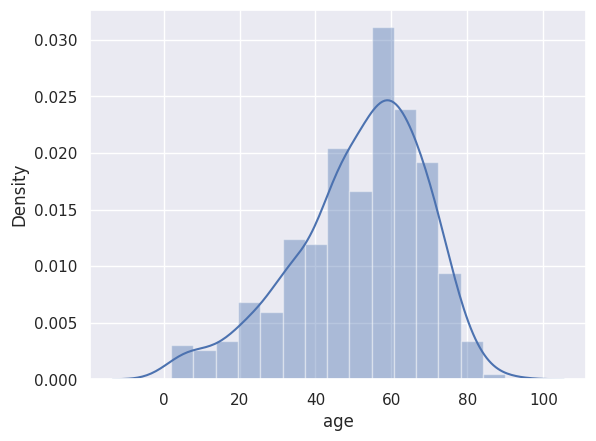

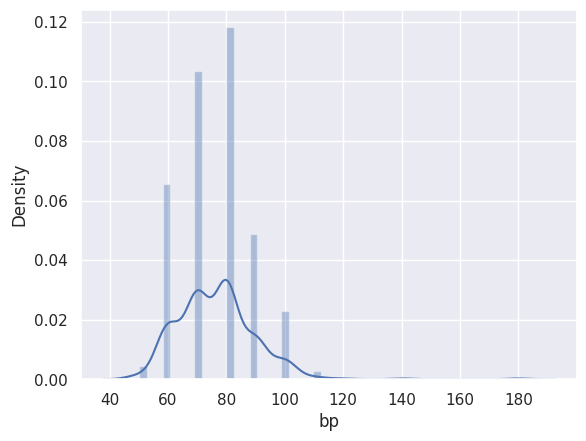

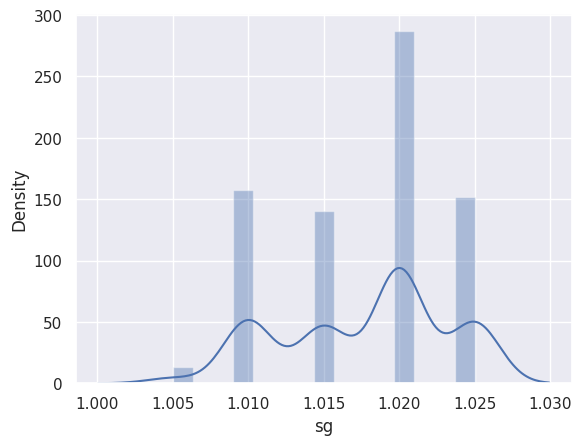

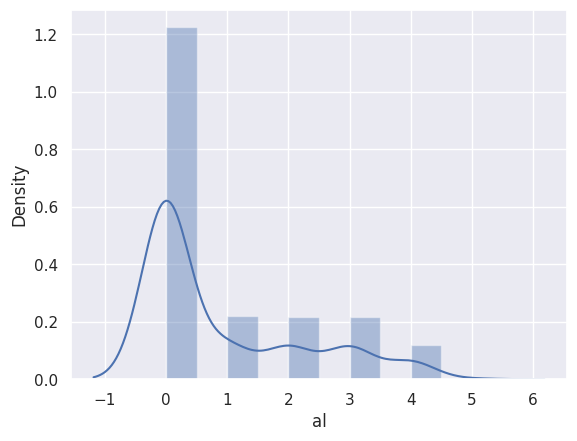

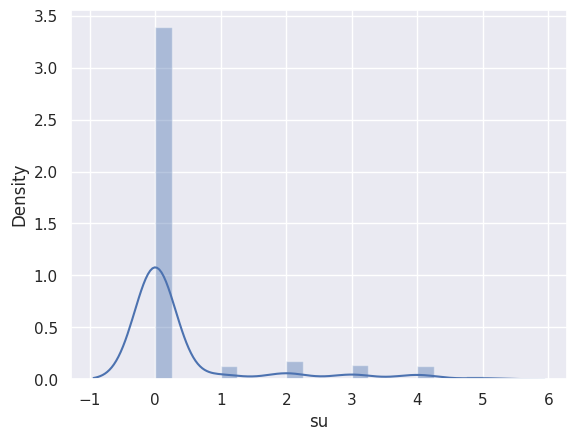

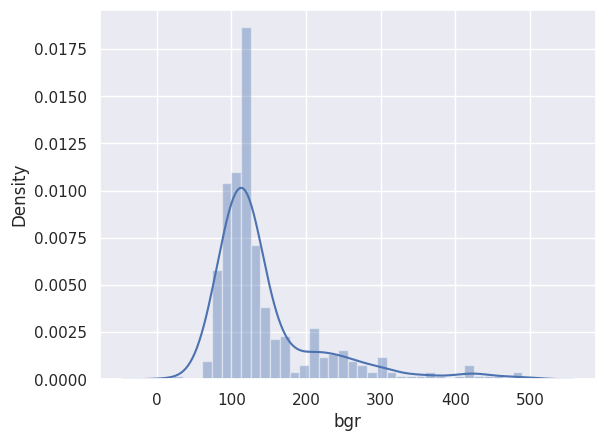

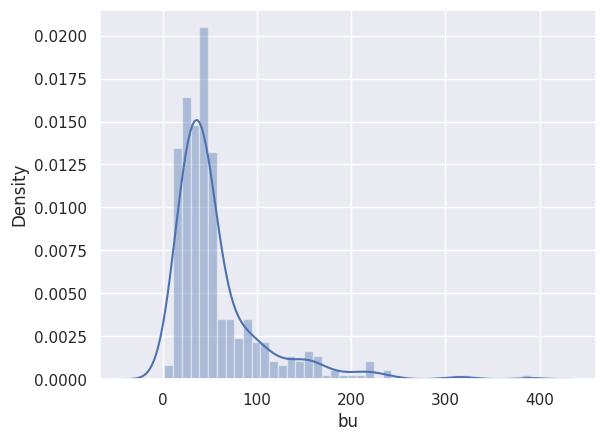

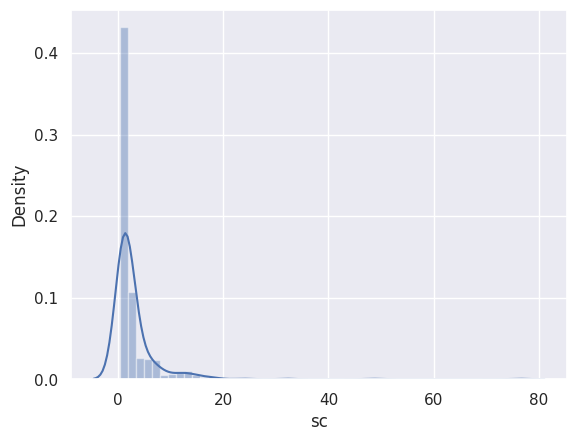

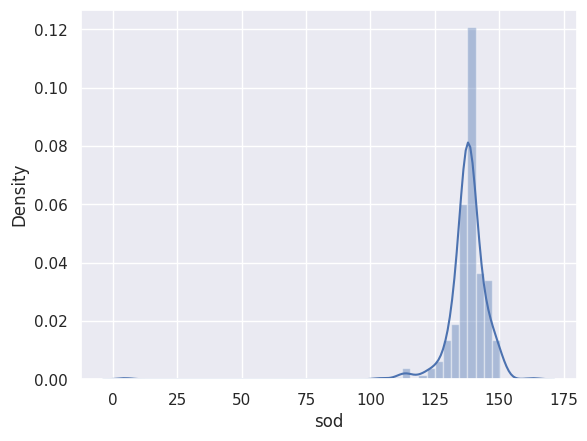

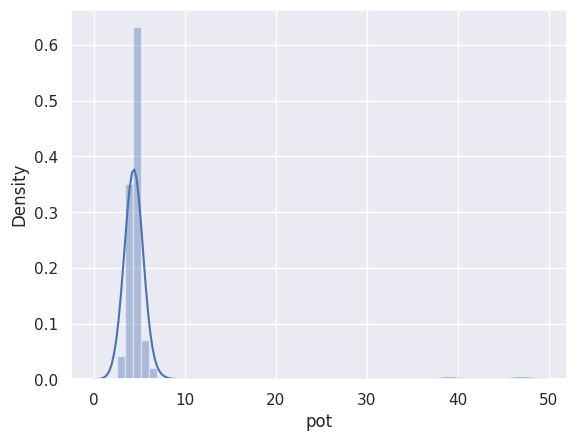

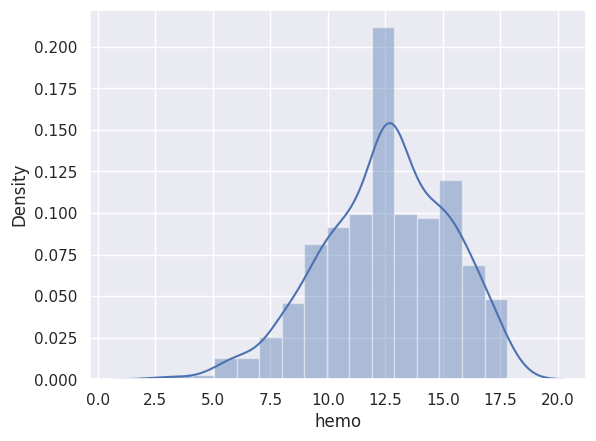

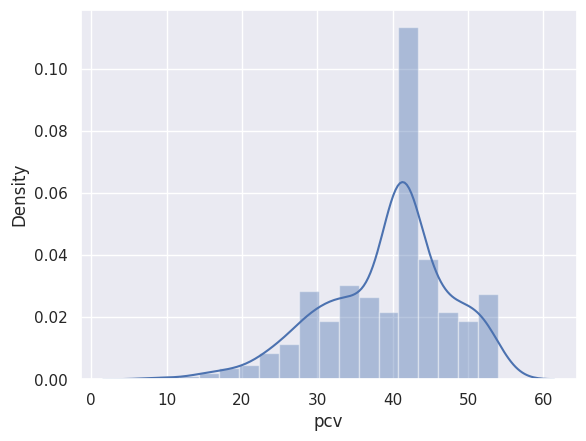

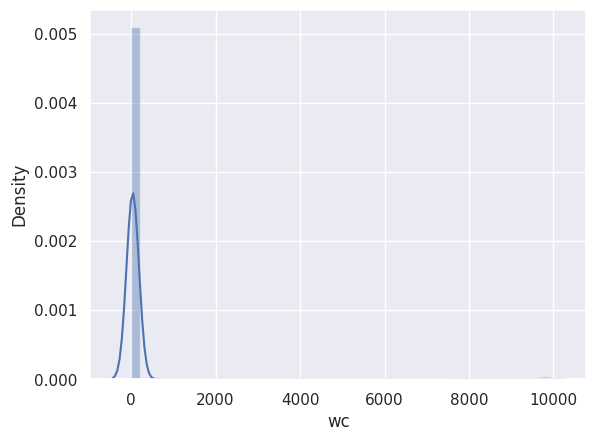

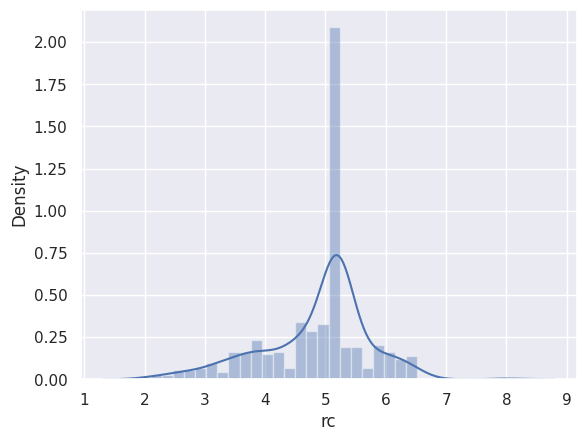

In [23]:
def distplots(df,col):
  sns.distplot(df[col])
  plt.show()
for i in df_imp2.select_dtypes(exclude=['object']).columns:
  distplots(df_imp2, i)

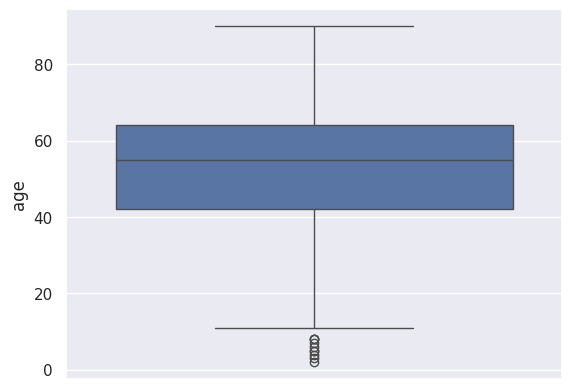

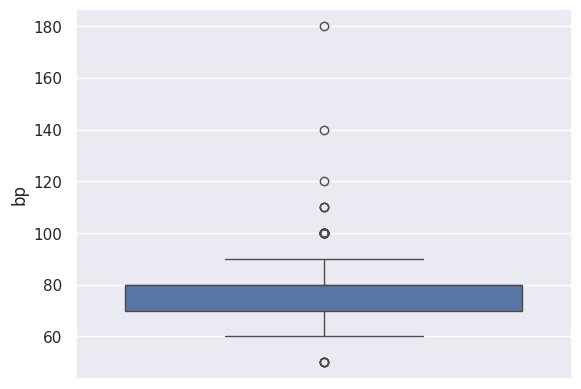

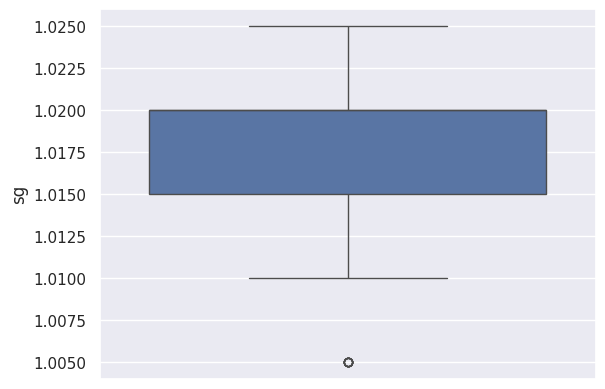

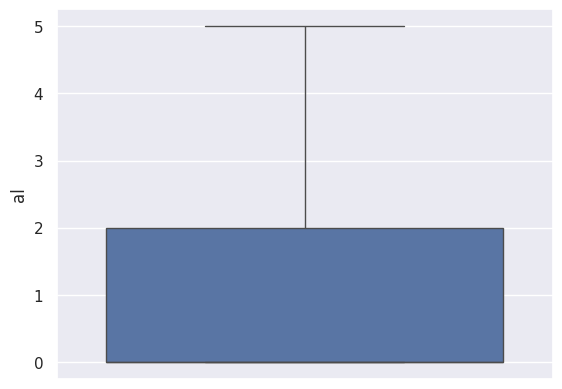

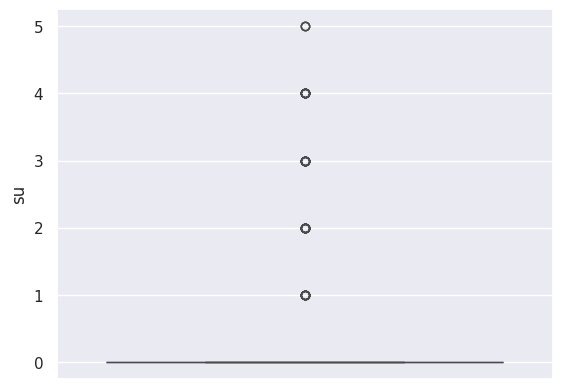

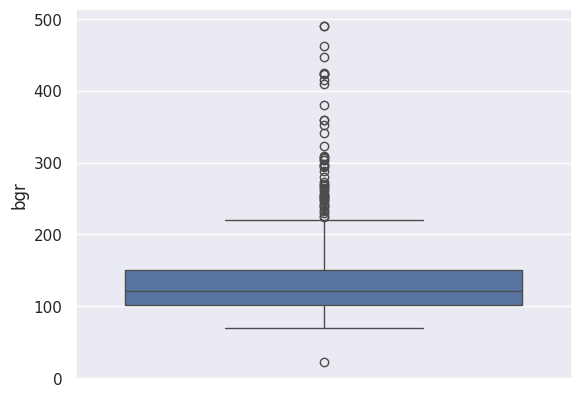

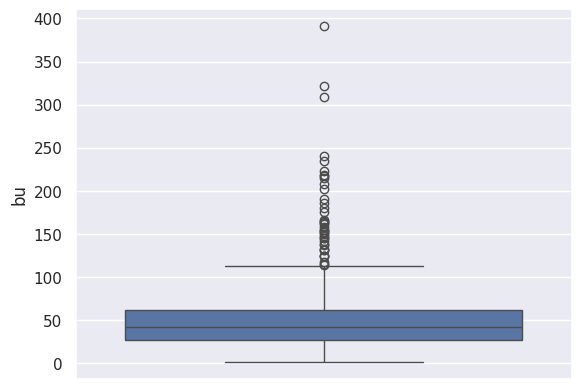

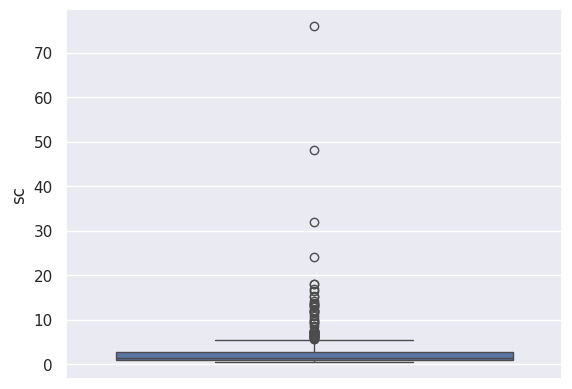

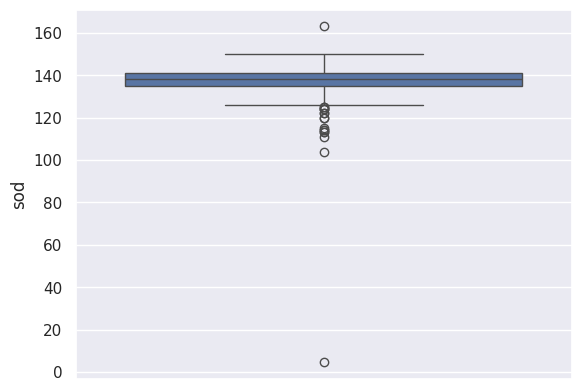

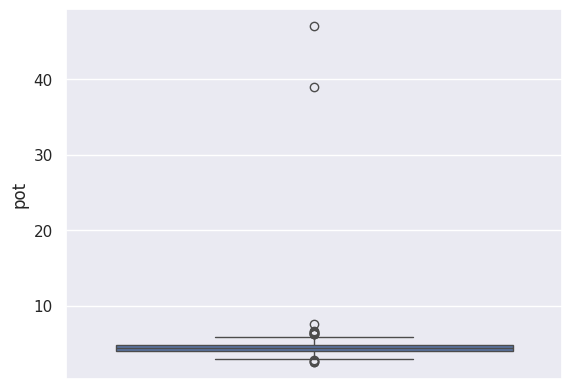

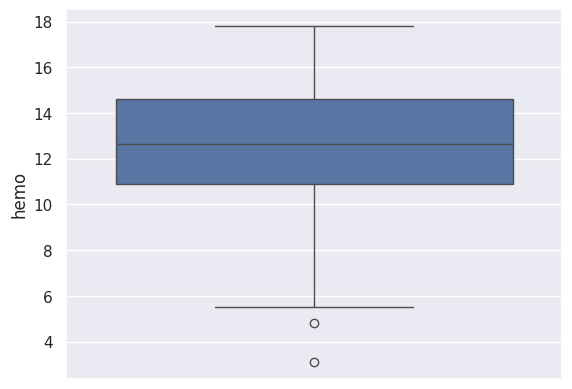

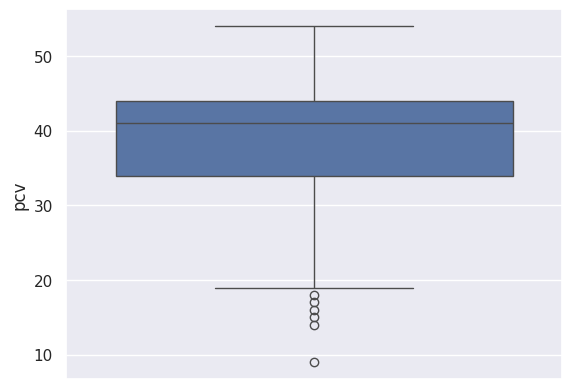

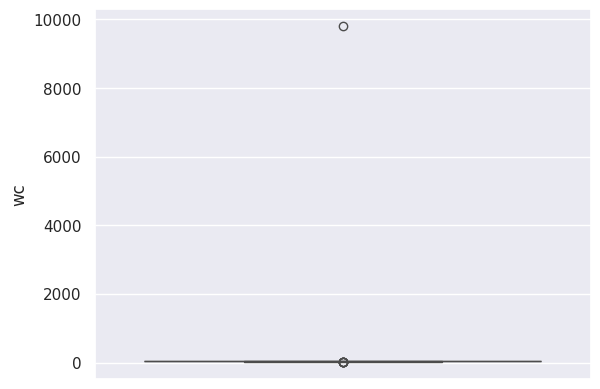

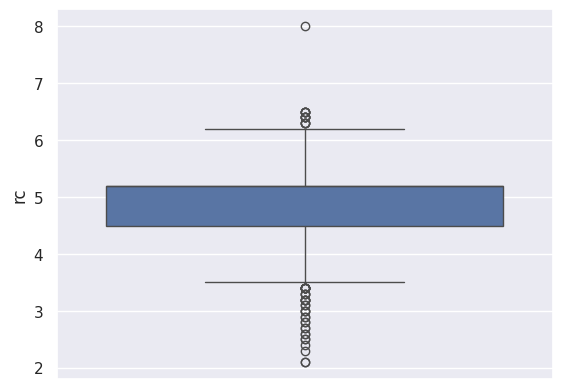

In [24]:
def boxplots(df,col):
  sns.boxplot(df[col])
  plt.show()
for i in df_imp2.select_dtypes(exclude=['object']).columns:
  boxplots(df_imp2, i)

In [25]:
df_final = pd.concat([df_imp1, df_imp2], axis = 1)
x = df_final.drop(['classification'], axis = 1)
y = df_final['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

In [26]:
x

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,44.0,5.2
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,38.0,5.2
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,31.0,5.2
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,32.0,3.9
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,35.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,47.0,4.9
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,54.0,6.2
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,49.0,5.4
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,51.0,5.9


In [27]:
def classify_features(df):
  categorical_features = []
  non_categorical_features = []
  discrete_features = []
  continuous_features = []
  for col in df.columns:
    if df[col].dtype == 'object':
      if df[col].nunique() < 10:
        categorical_features.append(col)
      else:
        non_categorical_features.append(col)
    elif df[col].dtype in ['int64', 'float64']:
      if df[col].nunique() < 10:
        discrete_features.append(col)
      else:
        continuous_features.append(col)
  return categorical_features, non_categorical_features, discrete_features, continuous_features


In [28]:
categorical_features, non_categorical_features, discrete_features, continuous_features = classify_features(x)
categorical_features, non_categorical_features, discrete_features, continuous_features

(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
 [],
 ['sg', 'al', 'su'],
 ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'])

In [29]:
# !pip install dtale


In [30]:
# import dtale
# dtale.show(df)

In [31]:
for i in categorical_features:
  print(x[i].value_counts())

rbc
normal      353
abnormal     47
Name: count, dtype: int64
pc
normal      324
abnormal     76
Name: count, dtype: int64
pcc
notpresent    358
present        42
Name: count, dtype: int64
ba
notpresent    378
present        22
Name: count, dtype: int64
htn
no     253
yes    147
Name: count, dtype: int64
dm
no     263
yes    137
Name: count, dtype: int64
cad
no     366
yes     34
Name: count, dtype: int64
appet
good    318
poor     82
Name: count, dtype: int64
pe
no     324
yes     76
Name: count, dtype: int64
ane
no     340
yes     60
Name: count, dtype: int64


In [32]:
df_categoricaldummies = pd.get_dummies(df[categorical_features], drop_first=True).apply(lambda x: x.astype(int))
df_categoricaldummies.columns

Index(['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [33]:
x[df_categoricaldummies.columns] = df_categoricaldummies
x.drop(categorical_features, axis = 1, inplace = True)

In [34]:
x.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,0,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,0,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
Model_LR = LogisticRegression().fit(x_train,y_train)
Model_DT = DecisionTreeClassifier().fit(x_train,y_train)
Model_RF = RandomForestClassifier().fit(x_train,y_train)
Model_XGB = XGBClassifier().fit(x_train,y_train)
Model_NB = GaussianNB().fit(x_train,y_train)
Model_KNN = KNeighborsClassifier().fit(x_train,y_train)
Model_SVC = SVC().fit(x_train,y_train)

list_met = []
list_accuracy = []

In [38]:
y_pred_lr = Model_LR.predict(x_test)
y_pred_dt = Model_DT.predict(x_test)
y_pred_rf = Model_RF.predict(x_test)
y_pred_xgb = Model_XGB.predict(x_test)
y_pred_nb = Model_NB.predict(x_test)
y_pred_knn = Model_KNN.predict(x_test)
y_pred_svc = Model_SVC.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

               Method  Accuracy
0  LogisticRegression    0.9750
1        DecisionTree    0.9625
2        RandomForest    0.9750
3             XGBoost    0.9875
4          NaiveBayes    0.9500
5                 KNN    0.8375
6                 SVC    0.8000
7              Voting    0.9875


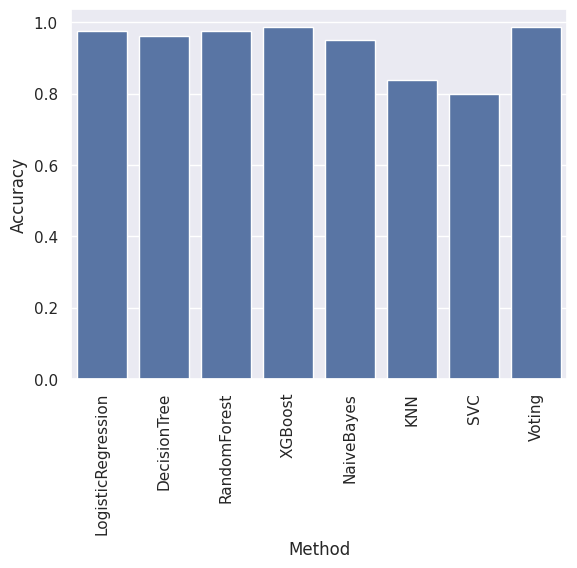

In [39]:
model_evaluation = VotingClassifier(estimators=[('Logistic_Regression', Model_LR), ('Decision_Tree', Model_DT), ('Random_Forest', Model_RF), ('xgb', Model_XGB), ('NaiveBayes', Model_NB), ('KNN', Model_KNN), ('SVC', Model_SVC)], voting='hard')
model_evaluation = model_evaluation.fit(x_train, y_train)
pred_evaluation = model_evaluation.predict(x_test)
accuracy_eval = accuracy_score(y_test, pred_evaluation)

list1 = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'XGBoost', 'NaiveBayes', 'KNN', 'SVC', 'Voting']
list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_nb, accuracy_knn, accuracy_svc, accuracy_eval]
list3 = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]

df_accuracy = pd.DataFrame({'Method': list1, 'Accuracy':list2})

print(df_accuracy)

chart = sns.barplot(data = df_accuracy, x = 'Method', y ='Accuracy')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()



In [40]:
#Check Bias Variance Trade off

pred_evaluation_train = model_evaluation.predict(x_train)
pred_evaluation_test = model_evaluation.predict(x_test)
accuracy_eval_train = accuracy_score(y_train, pred_evaluation_train)
accuracy_eval_test = accuracy_score(y_test, pred_evaluation_test)
print(accuracy_eval_train, accuracy_eval_test)


0.99375 0.9875


In [41]:
#Cross Validation
from sklearn.model_selection import cross_val_score

training = cross_val_score(model_evaluation, x_train, y_train, cv = 10)
testing = cross_val_score(model_evaluation, x_test, y_test, cv = 10)
print(f'Training Accuracy: {training.mean()}')
print(f'Testing Accuracy: {testing.mean()}')

Training Accuracy: 0.9875
Testing Accuracy: 0.975


In [42]:
from sklearn.metrics import classification_report

print(f'Training Accuracy: {classification_report(y_train, pred_evaluation_train)}')
print(f'Testing Accuracy: {classification_report(y_test, pred_evaluation_test)}')

Training Accuracy:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       122
           1       0.99      0.99      0.99       198

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Testing Accuracy:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [43]:
from sklearn.metrics import confusion_matrix

print(f'Training Accuracy: \n{confusion_matrix(y_train, pred_evaluation_train)}')
print(f'Testing Accuracy: \n{confusion_matrix(y_test, pred_evaluation_test)}')

Training Accuracy: 
[[121   1]
 [  1 197]]
Testing Accuracy: 
[[29  1]
 [ 0 50]]


In [44]:
#Deployment
cleaned_df = pd.concat([x,y], axis = 1)
cleaned_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,0,0,0,0,0,0,0,0,0


In [45]:
#Automation using pycaret
data = cleaned_df.sample(frac = 0.8, random_state = 42)
data_unseen = cleaned_df.drop(data.index)

In [46]:
# !pip install pycaret
from pycaret.classification import *

In [47]:
exp_classification = setup(data=data, target = 'classification', session_id = 1)

,Description,Value
0,Session id,1
1,Target,classification
2,Target type,Binary
3,Original data shape,"(320, 25)"
4,Transformed data shape,"(320, 25)"
5,Transformed train set shape,"(224, 25)"
6,Transformed test set shape,"(96, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [48]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9957,0.9968,1.0000,0.9933,0.9966,0.9907,0.9911,0.1760
et,Extra Trees Classifier,0.9957,0.9917,1.0000,0.9933,0.9966,0.9907,0.9911,0.1440
xgboost,Extreme Gradient Boosting,0.9957,0.9944,1.0000,0.9933,0.9966,0.9907,0.9911,0.1050
lightgbm,Light Gradient Boosting Machine,0.9957,0.9905,1.0000,0.9933,0.9966,0.9907,0.9911,0.3070
gbc,Gradient Boosting Classifier,0.9911,0.9927,1.0000,0.9867,0.9931,0.9806,0.9815,0.1280
lr,Logistic Regression,0.9822,0.9895,0.9857,0.9867,0.9857,0.9621,0.9637,0.7540
dt,Decision Tree Classifier,0.9779,0.9780,0.9795,0.9867,0.9825,0.9524,0.9545,0.0490
ada,Ada Boost Classifier,0.9777,0.9921,0.9719,0.9933,0.9820,0.9527,0.9547,0.1100
nb,Naive Bayes,0.9557,0.9944,0.9381,0.9933,0.9632,0.9084,0.9151,0.0510
lda,Linear Discriminant Analysis,0.9555,0.9855,0.9576,0.9729,0.9645,0.9049,0.9073,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [49]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9683,1.0000,0.9333,0.9655,0.9069,0.9108
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
#Fine tuning
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9206,1.0000,0.9333,0.9655,0.9069,0.9108
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
unseen_data_pred = predict_model(rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9625,0.9962,1.0000,0.9375,0.9677,0.9231,0.9258


In [55]:
#Deployment
import pickle
import joblib

# pickle_out = open('CKD_Model.pkl', 'wb')
# pickle.dump(rf, pickle_out)
# pickle_out.close()
joblib.dump(rf, 'CKD_Model.joblib')

['CKD_Model.joblib']

In [ ]:
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import joblib
import streamlit as st


classifier = joblib.load('C:/Users/sesha/Downloads/CKD_Model.joblib')

@st.cache_data()

def prediction(age,bp, sg, al, su, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, rbc_normal, pc_normal, pcc_present, ba_present, htn_yes, dm_yes, cad_yes, appet_poor, pe_ye, ane_yes):
  prediction = classifier(age,bp, sg, al, su, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, rbc_normal, pc_normal. pcc_present, ba_present, htn_yes, dm_yes, cad_yes, appet_poor, pe_ye, ane_yes)
  return prediction

def main():
    html_temp = '''<div style = 'background-color:tomato;padding:10px'>
    <h2 style = 'color:white;text-align:center;'>Chronic Kidney Disease Prediction</h2>
    </div>'''
    st.title('Chronic Kidney Disease Prediction')
    start_new = True
    # while start_new == True:
      # ask_next_param = False
    age = st.number_input('Enter age: ')
    bp = st.number_input('Enter blood pressure: ')
    sg = st.number_input('Enter specific gravity: ')
    al = st.number_input('Enter albumin level: ')
    su = st.number_input('Enter sugar level: ')
    bgr = st.number_input('Enter blood glucose random: ')
    bu = st.number_input('Enter blood urea: ')
    sc = st.number_input('Enter serum creatinine: ')
    sod = st.number_input('Enter sodium level: ')
    hemo = st.number_input('Enter hemoglobin level: ')
    pot = st.number_input('Enter potasium level: ')
    pcv = st.number_input('Enter packed cell volume: ')
    wc = st.number_input('Enter white blood cell count: ')
    rc = st.number_input('Enter red blood cell count: ')
    rbc = ['abnormal', 'normal'].index(st.radio('RBC', ['normal', 'abnormal']))
    pc = ['abnormal', 'normal'].index(st.radio('Pus Cell', ['normal', 'abnormal']))
    pcc = ['notpresent', 'present'].index(st.radio('Pus Cell CLumps', ['present', 'notpresent']))
    ba = ['notpresent', 'present'].index(st.radio('Bacteria', ['present', 'notpresent']))
    htn = ['no', 'yes'].index(st.radio('Hypertension', ['yes', 'no']))
    dm = ['no', 'yes'].index(st.radio('Diabetes Mellitus', ['yes', 'no']))
    cad = ['no', 'yes'].index(st.radio('Coronary Artery Disease', ['yes', 'no']))
    appet = ['good', 'poor'].index(st.radio('Appetitte', ['poor', 'good']))
    pe = ['no', 'yes'].index(st.radio('Pedal Edema', ['yes', 'no']))
    ane = ['no', 'yes'].index(st.radio('Anaemia', ['yes', 'no']))

    if st.button('Predict for Chronic Kidney Disease'):
        prediction = classifier.predict([[age,bp, sg, al, su, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane]])
        st.text(f'Prediction for CKD: {bool(prediction[0])}')
        start_new = False



if __name__=='__main__':
  main()





Overwriting app.py


In [1]:
data_unseen[data_unseen['classification']==0].values[3]

NameError: name 'data_unseen' is not defined

In [ ]:
run app.py

SyntaxError: invalid syntax (app.py, line 2)